In [13]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from scipy.interpolate import interp1d
# Read the JSON file
with open('./test_data/MVl_3208_1/ball_info_3d.json') as file:
    data = json.load(file)

# Initialize lists to store frame numbers and coordinates
frame_nums = []
x_coords = []
y_coords = []
z_coords = []

# Extract frame number, x, y, and z coordinates excluding nan values
for entry in data:
    frame_num = int(entry['frame_name'].split('_')[-1].split('.')[0][-2:])
    x_coord = entry['x']
    y_coord = entry['y']
    z_coord = entry['z']

    # Exclude nan values
    if not np.isnan(x_coord) and not np.isnan(y_coord) and not np.isnan(z_coord):
        frame_nums.append(int(frame_num))
        x_coords.append(int(x_coord)/10000)
        y_coords.append(int(y_coord)/10000)
        z_coords.append(int(z_coord)/10000)
# Convert lists to arrays
frame_nums = np.array(frame_nums)
x_coords = np.array(x_coords)
y_coords = np.array(y_coords)
z_coords = np.array(z_coords)

In [60]:
# X_Spline = make_interp_spline(frame_nums,x_coords)
 
# # Returns evenly spaced numbers
# # over a specified interval.
# frame_nums_ = np.linspace(frame_nums.min(), frame_nums.max(), 100)
# x_coords_ = X_Spline(frame_nums_)

In [22]:
cubic_interpolation_model  = interp1d(frame_nums,z_coords)
 
# Returns evenly spaced numbers
# over a specified interval.
frame_nums_ = np.linspace(frame_nums.min(), frame_nums.max(), 50)
z_coords_ = cubic_interpolation_model(frame_nums_)

In [3]:
# Plot frame_num vs x
plt.plot(frame_nums_, x_coords_)
plt.xlabel('Frame Number')
plt.ylabel('x-coordinate')
plt.title('Frame Number vs x-coordinate')
plt.show()

NameError: name 'x_coords_' is not defined

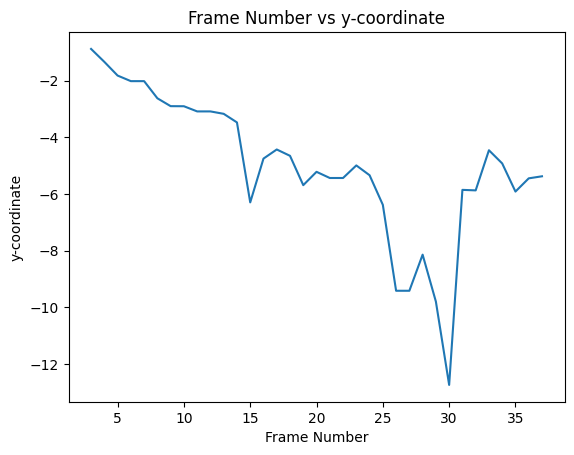

In [4]:
# Plot frame_num vs y
plt.plot(frame_nums, y_coords)
plt.xlabel('Frame Number')
plt.ylabel('y-coordinate')
plt.title('Frame Number vs y-coordinate')
plt.show()


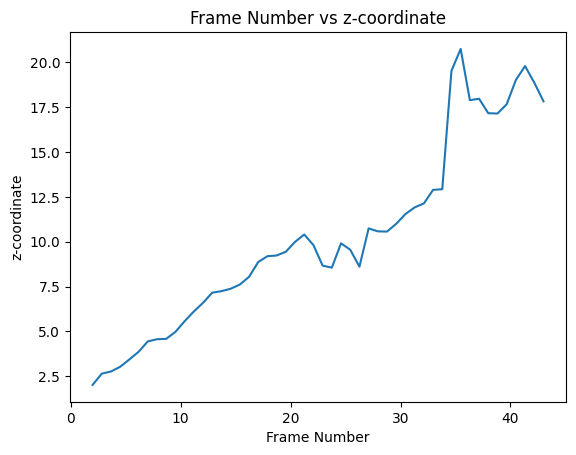

In [23]:
# Plot frame_num vs z
plt.plot(frame_nums_, z_coords_)
plt.xlabel('Frame Number')
plt.ylabel('z-coordinate')
plt.title('Frame Number vs z-coordinate')
plt.show()

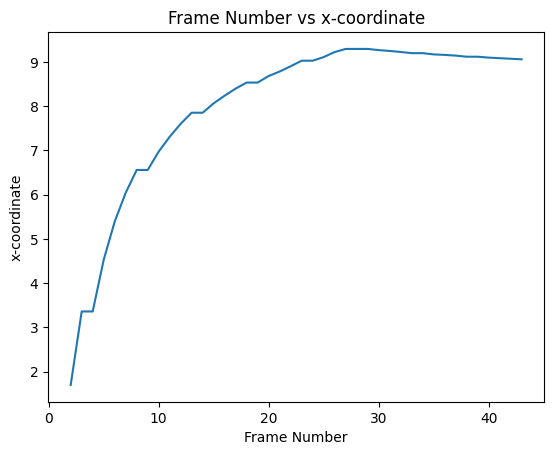

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('./test_data/MVl_3208_1/ball_info.csv')

# Extract frame number from the frame_name
data['frame_num'] = data['filename'].str[-6:-4].astype(int)

# Plot frame_num vs x
plt.plot(data['frame_num'], data['x_center']/100)
plt.xlabel('Frame Number')
plt.ylabel('x-coordinate')
plt.title('Frame Number vs x-coordinate')
plt.show()



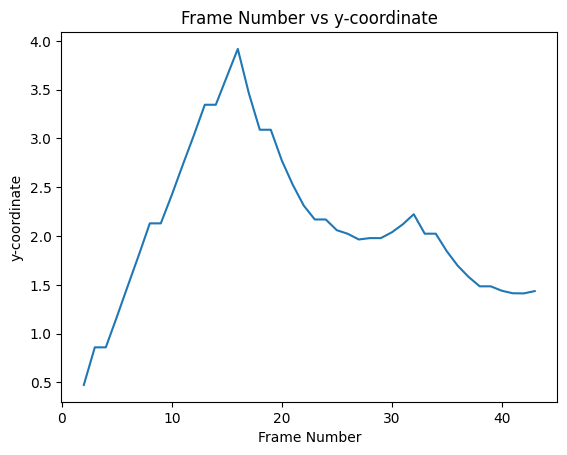

In [26]:
# Plot frame_num vs y
plt.plot(data['frame_num'], data['y_center']/100)
plt.xlabel('Frame Number')
plt.ylabel('y-coordinate')
plt.title('Frame Number vs y-coordinate')
plt.show()